In [3]:
class naive_KNN:
    def __init__(self, k,X,y):
        self.k = k
        self.dataset = [(X[i], y[i]) for i in range(len(X))]
    def predict(self, x):
        distances = []
        for i in range(len(self.dataset)):
            distances.append((i, self.distance(x, self.dataset[i][0])))
        distances.sort(key=lambda x: x[1])
        k_nearest = distances[:self.k]
        return self.majority_vote(k_nearest)
    def distance(self, x1, x2):
        return sum((x1[i] - x2[i])**2 for i in range(len(x1)))**0.5
    def majority_vote(self, k_nearest):
        votes = {}
        for i in range(len(k_nearest)):
            label = self.dataset[k_nearest[i][0]][1]
            if label in votes:
                votes[label] += 1
            else:
                votes[label] = 1
        return max(votes, key=votes.get)

In [4]:
import time, tracemalloc
import pandas as pd

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target


In [5]:
naive_knn=naive_KNN(5,X,y)
predicted_val=[]
start_time = time.time()
tracemalloc.start()
for i in range(len(X)):
    predicted_val.append(naive_knn.predict(X[i]))

train_end_time = time.time()

print("Memory usage: ", tracemalloc.get_traced_memory()[1], "bytes")
tracemalloc.stop()
print("Execution time: ", train_end_time - start_time, "s")
print("Accuracy: ", naive_knn.score(list(zip(X, y))))

Memory usage:  19964 bytes
Execution time:  0.3763141632080078 s
Accuracy:  0.9666666666666667


In [6]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=400, centers=5, random_state=42)

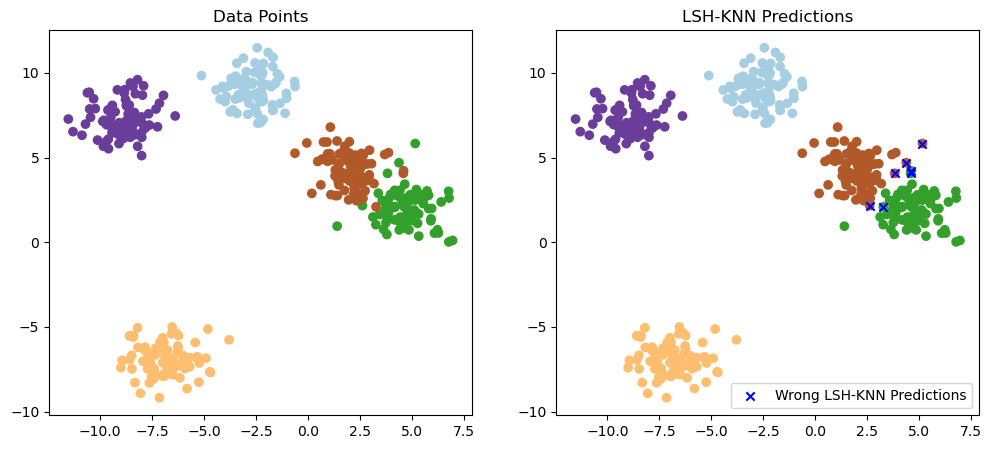

In [7]:
import matplotlib.pyplot as plt

naive_knn=naive_KNN(5,X,y)
y_knn_pred=[]
for i in range(len(X)):
    y_knn_pred.append(naive_knn.predict(X[i]))


plt.figure(figsize=(12, 5))

# Plot for exact KNN
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Data Points")

# Plot for LSH-KNN
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_knn_pred, cmap=plt.cm.Paired)
plt.title("LSH-KNN Predictions")


wrong_lsh = X[y != y_knn_pred]
plt.scatter(wrong_lsh[:, 0], wrong_lsh[:, 1], c='blue', marker='x', label='Wrong LSH-KNN Predictions')

plt.legend()
plt.show()

In [8]:
# generate synthetic data
from sklearn.datasets import make_classification
import numpy as np
query_time=[]
memory_usage=[]
for dataset_size in [100, 200, 500, 1000, 2000]:
    print("Dataset size:", dataset_size)
    X, y = make_classification(n_samples=dataset_size, n_features=100, n_informative=10, n_redundant=10, n_clusters_per_class=2)
    naive_knn=naive_KNN(5,X,y)
    #select 100 points randomly foar testing
    random_indices = np.random.choice(len(X), 100, replace=False)
    start_time = time.time()
    tracemalloc.start()
    for i in random_indices:
        naive_knn.predict(X[i])
    end_time = time.time()
    query_time.append(end_time - start_time)
    
    memory_usage.append(tracemalloc.get_traced_memory()[1])
    tracemalloc.stop()
    # print("Execution time for dataset size", dataset_size, ":", end_time - start_time, "s")
    # print("Accuracy for dataset size", dataset_size, ":", naive_knn.score(list(zip(X, y))), "\n")

df = pd.DataFrame({'Dataset Size': [100, 200, 500, 1000, 2000], 'Query Time': query_time, 'Memory Usage': memory_usage})
print(df)


Dataset size: 100
Dataset size: 200
Dataset size: 500
Dataset size: 1000
Dataset size: 2000
   Dataset Size  Query Time  Memory Usage
0           100    2.795981        151733
1           200    5.060878        156309
2           500   13.295762        188481
3          1000   38.314373        246159
4          2000   49.429201        349057


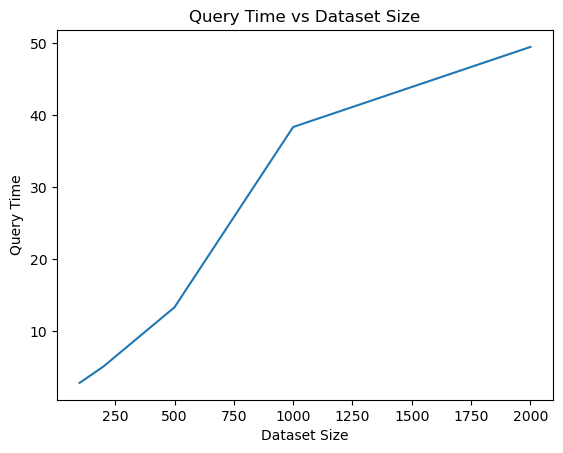

In [9]:
#plot graph for query time vs dataset size
plt.plot(df['Dataset Size'], df['Query Time'])
plt.xlabel('Dataset Size')
plt.ylabel('Query Time')
plt.title('Query Time vs Dataset Size')
plt.show()


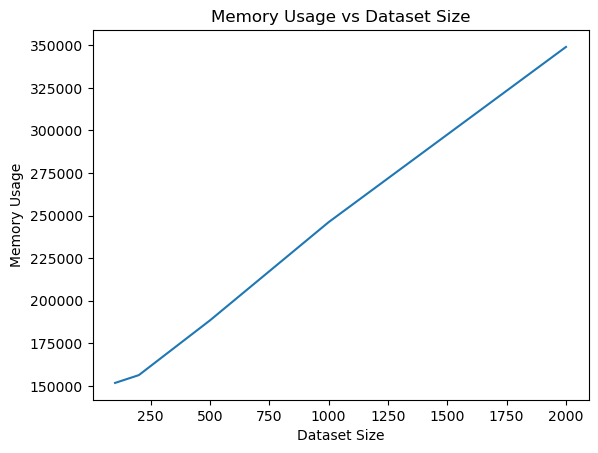

In [10]:
#plot graph for memory usage vs dataset size
plt.plot(df['Dataset Size'], df['Memory Usage'])
plt.xlabel('Dataset Size')
plt.ylabel('Memory Usage')
plt.title('Memory Usage vs Dataset Size')
plt.show()


In [12]:
# generate synthetic data
from sklearn.datasets import make_classification
import numpy as np
query_time=[]
memory_usage=[]
for d in [2,5,10,20,50,100,200,500,1000,2000]:
    print("Dimensions:", d)
    X, y = make_classification(n_samples=1000, n_features=d, n_informative=1, n_redundant=1, n_clusters_per_class=1)
    naive_knn=naive_KNN(5,X,y)
    #select 100 points randomly foar testing
    random_indices = np.random.choice(len(X), 100, replace=False)
    start_time = time.time()
    tracemalloc.start()
    for i in random_indices:
        naive_knn.predict(X[i])
    end_time = time.time()
    query_time.append(end_time - start_time)
    
    memory_usage.append(tracemalloc.get_traced_memory()[1])
    tracemalloc.stop()
    # print("Execution time for dataset size", dataset_size, ":", end_time - start_time, "s")
    # print("Accuracy for dataset size", dataset_size, ":", naive_knn.score(list(zip(X, y))), "\n")

df = pd.DataFrame({'Dimension': [2,5,10,20,50,100,200,500,1000,2000], 'Query Time': query_time, 'Memory Usage': memory_usage})
print(df)

Dimensions: 2
Dimensions: 5
Dimensions: 10
Dimensions: 20
Dimensions: 50
Dimensions: 100
Dimensions: 200
Dimensions: 500
Dimensions: 1000
Dimensions: 2000
   Dimension  Query Time  Memory Usage
0          2    1.005828        858806
1          5    1.606760        218871
2         10    2.761478        218856
3         20    4.644574        217849
4         50   11.283387        217849
5        100   21.787127        217849
6        200   42.804519        217849
7        500  117.999257        217849
8       1000  256.401227        217849
9       2000  438.847572        217849


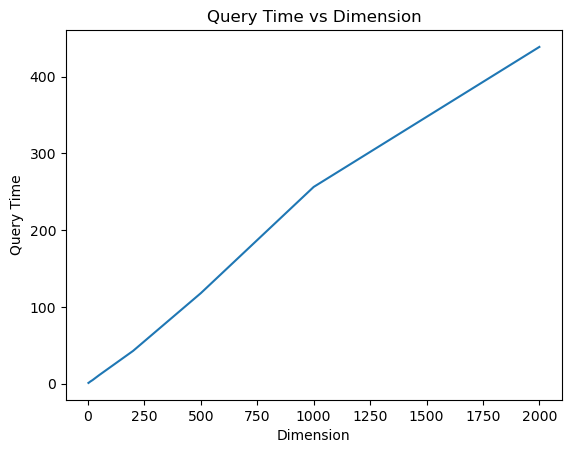

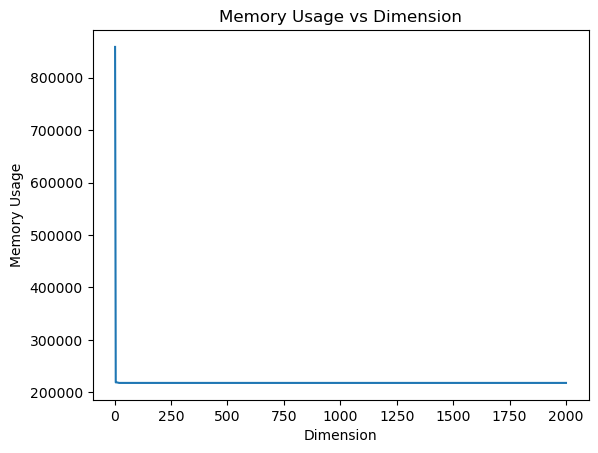

In [14]:
#plot graph for query time vs dimension
plt.plot(df['Dimension'], df['Query Time'])
plt.xlabel('Dimension')
plt.ylabel('Query Time')
plt.title('Query Time vs Dimension')
plt.show()

plt.plot(df['Dimension'], df['Memory Usage'])
plt.xlabel('Dimension')
plt.ylabel('Memory Usage')
plt.title('Memory Usage vs Dimension')
plt.show()